# 施設配置問題


In [ ]:
#| default_exp gis1

In [ ]:
#| hide
from nbdev.showdoc import *

施設配置問題は，候補地の中からある目的関数を最適化するように実際に施設を配置する場所を選び出す問題である。施設配置問題を知るのに適切な文献として，[田中健一，数理最適化入門(4) : 施設配置の数理モデル(チュートリアル)，応用数理23(4),2013](https://www.jstage.jst.go.jp/article/bjsiam/23/4/23_KJ00008992858/_article/-char/ja/)が挙げられる。


施設配置問題を定めるには，需要点の集合$I$と，配置候補地$J$を定義する。そして，需要点$i \in I$から$j \in J$への移動距離$d_{ij}$が与えられるとする。さらに，需要点$i$の需要量$w_i$が与えられるとする。

また，配置候補地$j \in J$に対して0-1変数$x_j$を導入する。候補地$j \in J$に施設を配置すること1，そうでないとき0をとる変数とする。そして，$i \in I$と$j \in J$の各ペアに対して，変数$y_{ij}$を定義する。この変数は，需要$i$を施設$j$に配置するとき1，そうでないとき0となる。

施設配置問題の目的関数は，各需要点から，その需要点に割り当てられた施設への移動距離の重み付き和$\sum_{i \in I}\sum_{j \in J}w_id_{ij}y_{ij}$とする。

制約条件としては，

- 配置する施設数がちょうど$p$個となる制約:

$$
\sum_{j \in J}x_j=p
$$

- 各需要点がちょうど1つの施設に割り当てられることを課す制約

$$
\sum_{j \in J}y_{ij}=1 \ \ \forall i  \in I 
$$

- 需要点$i$が施設$j$に割り当てられるには施設$j$が配置されている必要があることを課す制約

$$
y_{ij} \leq x_j \ \ \forall i  \in I,\ \forall j  \in J 
$$

を課す。まとめると，施設配置問題は，次の整数計画問題として定式化される。

$$
\begin{array}{lll}
\min&\displaystyle \sum_{i  \in I}\sum_{j \in J}w_id_{ij}y_{ij}&\\ 
\text{s.t.}&\displaystyle\sum_{j \in J }x_j=p&\\
&\displaystyle\sum_{j\in J}y_{ij}=1&\ \forall i  \in I\\
&y_{ij}\leq\ x_j&\ \forall i  \in I\ \forall j  \in J\\
&x_j\in\{0,1\}&\ \forall j \in J\\
&y_{ij}\in\{0,1\}&\ \forall i \in I,\forall j \in J.
\end{array}
$$



この整数計画問題を解くためのプログラムを定める。まず，集合$I,J$，$w_i$，$d_{ij}$，$p$を定めるリストと辞書を定義する。

In [ ]:
#需要点の集合の定義
I=[0,1]
#配置候補地の集合
J=[0,1,2,3,4]
#需要量の定義
w={0:10,1:15,2:7,3:9,4:12}
#施設数の定義
p=2

# costsの定義
costs = {
    (0, 0): 4,
    (0, 1): 6,
    (0, 2): 9,
    (0, 3): 8,
    (0, 4): 7,
    (1, 0): 5,
    (1, 1): 8,
    (1, 2): 7,
    (1, 3): 6,
    (1, 4): 4
}

これらを用いて施設配置問題を解く関数`facilitylocation()`を定める。

In [42]:


from pulp import *

def facilitylocation(I,J,w,costs,p):
    # 空の線形計画問題を生成する
    prob = LpProblem("FacilityLocation", LpMinimize)

    # 決定変数を定める
    y=LpVariable.dicts("y",[(i,j) for i in I for j in J],cat='Binary')
    x=LpVariable.dicts("x",[j for j in J],cat='Binary')

    # 目的関数の定義
    prob += lpSum([w[i]*costs[(i, j)] * y[(i, j)] for j in J] for i in I)

    # 制約条件の定義
    prob+=lpSum([x[j] for j in J])==p

    for i in I:
        prob+=lpSum([y[(i,j)] for j in J])==1

    for i in I:
        for j in J:
            prob+=y[(i,j)]<=x[j]

    # 最適化の実行
    prob.solve();

    # Print the results
    print("Status:", LpStatus[prob.status])
    for v in prob.variables():
        print(v.name, "=", v.varValue)
    print("Total Cost = ", value(prob.objective))
    


こうして定義した関数を用いて配置する施設と，各需要点の施設への割り当てを求める。

In [43]:

facilitylocation(I,J,w,costs,p)

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 19 2023 

command line - cbc /var/folders/w6/pzry98n55l31dnvgymbwt9jh0000gn/T/8b46036933744d2db5bb7156cf4f5a18-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/w6/pzry98n55l31dnvgymbwt9jh0000gn/T/8b46036933744d2db5bb7156cf4f5a18-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 18 COLUMNS
At line 94 RHS
At line 108 BOUNDS
At line 124 ENDATA
Problem MODEL has 13 rows, 15 columns and 35 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 100 - 0.00 seconds
Cgl0004I processed model has 13 rows, 15 columns (15 integer (15 of which binary)) and 35 elements
Cutoff increment increased from 1e-05 to 4.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of 100
Cbc0038I Before mini branch and bound, 15 integers at bound fixed and 0 continuous
Cbc0038I Mini branch and boun

この出力結果から，最適解が求まったことがわかる。配置する施設は0と4であり，需要点0は施設0に，需要点1は施設4に掘り当てることが最適であることがわかる。また，その時の目的関数値は100であることもわかる。


In [44]:
#| hide
import nbdev; nbdev.nbdev_export()

実際の地理情報を用いた例

[国土数値情報ダウンロードサイト](https://nlftp.mlit.go.jp/ksj/)から，[医療機関データ](https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-P04-v3_0.html)をダウンロードする。

ここのリストから，神奈川，世界測地系，令和2年のデータである，P04-20_13_GML.zipをダウンロードする。

ダウンロードしたファイルを解凍して，得られたフォルダを`data`フォルダに収める。

こうして得たファイルを，`geopandas`の`read_file()`により読み込む。

In [45]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [58]:
hosp=gpd.read_file('data/P04-20_13_GML/P04-20_13.geojson')
hosp.head()

,P04_001,P04_002,P04_003,P04_004,P04_005,P04_006,P04_007,P04_008,P04_009,P04_010,geometry
0,3,キタカタ歯科医院,江戸川区南篠崎町3-3-1 スイートヒルズ瑞江1階,歯,NaN,NaN,9,0,9,9,POINT (139.90021 35.69387)
1,3,スギタ歯科篠崎診療室,江戸川区上篠崎2-4-3,歯 小歯 矯歯 口外,NaN,NaN,9,0,9,9,POINT (139.90121 35.71164)
2,2,江戸川区葛西健康サポ-トセンタ-,江戸川区中葛西3-10-1,内 小 歯,NaN,NaN,9,0,9,9,POINT (139.86965 35.66591)
3,2,江戸川区江戸川保健所,江戸川区中央4-24-19,内 小 歯,NaN,NaN,9,0,9,9,POINT (139.86835 35.70958)
4,3,西葛西ファミリー歯科,江戸川区西葛西3-9-19 イオン葛西店4階,歯 小歯 口外 矯歯,NaN,NaN,9,0,9,9,POINT (139.85850 35.66924)


このデータのうち，`P04_001`列に，医療機関の分類を示す値が含まれている。これが1なら病院，2なら診療所，3なら歯科診療所であることを示す。この列の値が1であるものを抜き出し，あらためてhospというデータにする。

In [59]:
hosp=hosp[hosp["P04_001"]==1]

`hosp`の先頭の5行を表示して確かに病院が抜き出されていることを確認する。

In [60]:
hosp.head()

,P04_001,P04_002,P04_003,P04_004,P04_005,P04_006,P04_007,P04_008,P04_009,P04_010,geometry
81,1,３６６リハビリテーション病院,府中市住吉町1-34-6,リハビリ科,NaN,NaN,4,68,9,9,POINT (139.45764 35.66162)
225,1,ＪＲ東京総合病院,渋谷区代々木2-1-3,内科 呼吸器内科 循環器内科 消化器内科 脳神経内科 糖尿病内分泌内科 血液腫瘍内科 リウマ...,放射線科 麻酔科 ペイン外科 臨床検査科 救急科 皮膚科 歯科口腔外科 病理診断科 血管外科,NaN,6,425,1,9,POINT (139.69977 35.68569)
317,1,ＮＴＴ東日本関東病院,品川区東五反田5-9-22,内科 呼吸器内科 循環器内科 小児科 精神科 外科 整形外科 脳神経外科 心臓血管外科 産婦...,腎臓内科 感染症内科 緩和ケア内科 脳神経内科 脳 血管内科 乳腺外科 呼吸器外科 頭頸部外...,NaN,6,594,1,2,POINT (139.72554 35.63129)
587,1,あきしま相互病院,昭島市もくせいの杜2-2-1,内科 精神科 リハビリ科,NaN,NaN,4,110,9,9,POINT (139.38428 35.71871)
644,1,あけぼの病院,町田市中町1-23-3,内科 循環器内科 腎臓内科 人工透析内科 糖尿病内分泌内科 ペイン内科 外科 消化器外科 大...,NaN,NaN,4,98,1,9,POINT (139.44508 35.54962)


これから，特に町田市内の病院に注目する。そこで，東京都の[行政区域を示すデータ](https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-N03-v3_1.html)をダウンロードし，町田市の行政区域コード13209を用いて町田市のデータを取り出す。ダウンロードするのは，世界測地系，令和5年のデータである，N03-20230101_13_GMP.zipとする。

In [63]:
tokyo=gpd.read_file('data/N03-20230101_13_GML/N03-23_13_230101.geojson')
machida=tokyo[tokyo["N03_007"]=='13209'].copy()

得られた`machida`をプロットして，確かに町田市の行政区域であることを確認する。

<Axes: >

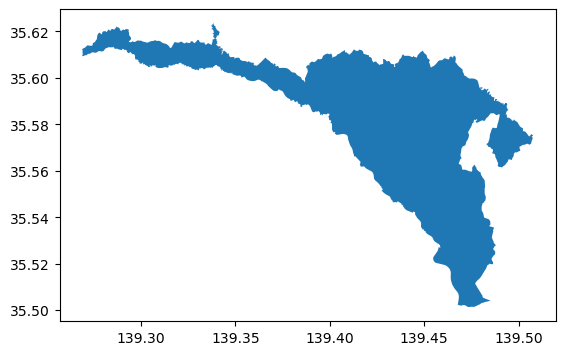

In [65]:
machida.plot()

町田市内の病院を，`geopandas`の`sjoin`という演算を用いて取り出す。`how="inner"`を指定することで，`sjoin()`の最初の引数`hosp`からデータを取り出す。同時に，`op="within"`を指定することで，`machida`の区域（多角形）に含まれる`hosp`の行を取り出す。

In [66]:
hosp_in_machida=gpd.sjoin(hosp,machida,how="inner",op="within")

/Users/kazuhiro/miniconda3/envs/nbdev/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


`hosp_in_machida`の列のなかから，必要なものだけを抜き出したものを，あらためて`hosp_in_machida`とする。

In [85]:
hosp_in_machida=hosp_in_machida[['P04_001','P04_002','P04_003','P04_004','P04_008','P04_009','P04_010','geometry']]

さらに，救急告示病院を抜き出したものを，`em_hosp`とする。`P04_009`列が1であるものが，救急告示病院である。

In [88]:
em_hosp=hosp_in_machida[hosp_in_machida["P04_009"]==1]

抜き出したままだとindexが飛び飛びの値になっているので，この番号を`reset_index()`によって振り直す。

In [90]:
em_hosp=em_hosp.reset_index()
em_hosp

,index,P04_001,P04_002,P04_003,P04_004,P04_008,P04_009,P04_010,geometry
0,644,1,あけぼの病院,町田市中町1-23-3,内科 循環器内科 腎臓内科 人工透析内科 糖尿病内分泌内科 ペイン内科 外科 消化器外科 大...,98,1,9,POINT (139.44508 35.54962)
1,4530,1,ふれあい町田ホスピタル,町田市小山ヶ丘1-3-8,内科 循環器内科 人工透析内科 神経内科 皮膚科 精神科 消化器外科 泌尿器科 脳神経外科 ...,199,1,9,POINT (139.38273 35.59798)
2,6509,1,医療法人社団 慶泉会 町田慶泉病院,町田市南町田2-1-47,内科 神経内科 外科 整形外科 泌尿器科 肛門外科 リハビリ科 麻酔科 血管外科 脳外科 腎臓内科,148,1,9,POINT (139.47072 35.52103)
3,6599,1,医療法人社団 幸隆会 多摩丘陵病院,町田市下小山田町1491,内科 外科 消化器外科 整形外科 脳神経外科 婦人科 眼科 泌尿器科 リハビリ科 麻酔科 歯...,316,1,9,POINT (139.42167 35.60461)
4,6681,1,医療法人社団 三医会 鶴川記念病院,町田市三輪町1059-1,内科 小児科 リハビリ科,180,1,9,POINT (139.49661 35.57220)
5,7085,1,医療法人社団 創生会 町田病院,町田市木曽東4-21-43,内科 胃腸科 循環器科 精神科 神経科 外科 整形外科 脳神経外科 皮膚科 リハビリ科 救急...,120,1,9,POINT (139.42529 35.56538)
6,17133,1,社会医療法人社団 正志会 南町田病院,町田市鶴間4-4-1,内科 呼吸器内科 消化器内科 循環器内科 神経内科 小児科 外科 呼吸器外科 消化器外科 乳...,222,1,2,POINT (139.47121 35.50702)
7,21336,1,町田市民病院,町田市旭町2-15-41,内科 小児科 精神科 アレルギー科 リウマチ科 外科 整形外科 形成外科 脳神経外科 心臓血...,447,1,2,POINT (139.43859 35.55705)


得られた病院を，町田市の行政区域データと重ねて図示する。

<Axes: >

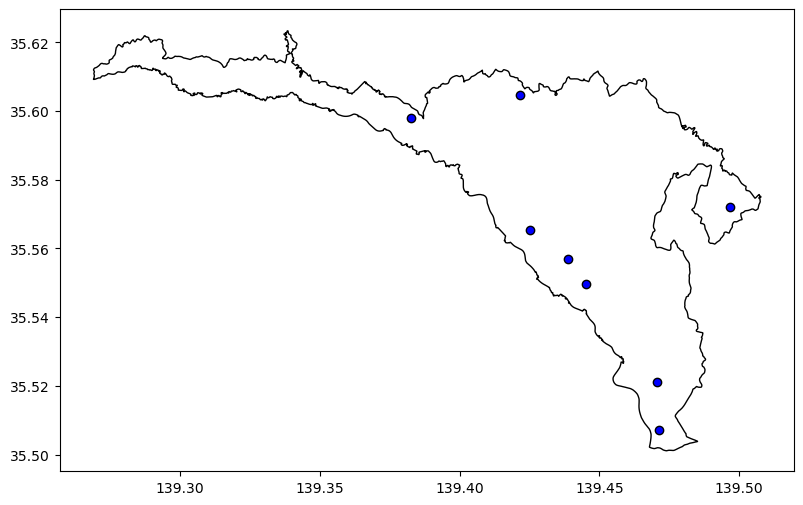

In [91]:
fig,ax=plt.subplots(figsize=(10,6))
machida.plot(ax=ax,color="white",edgecolor="black")
em_hosp.plot(ax=ax,color="blue",edgecolor="black")

次に，町田市内の各地域の人口データを用いて，各地域の病院の需要を設定する。まず，東京都の人口データをダウンロードする。[国土数値情報ダウンロードサイト](https://nlftp.mlit.go.jp/ksj/index.html)の「5.各種統計」の1kmメッシュ別将来推計人口データをダウンロードする。

これは，世界測地系，平成30年のデータであり，ファイル名は，`1km_mesh_suikei_2018_shape_13.zip`である。これを展開して，`data`フォルダに移動する。

この中のshapefileを読み込み，`SHICODE`列（行政区域コード）が13209（町田市）のものを抜き出して，`machida_pop`とする。

In [87]:
pop=gpd.read_file("data/1km_mesh_suikei_2018_shape_13/1km_mesh_2018_13.shp")
machida_pop=pop[pop["SHICODE"]==13209].copy()

<Axes: >

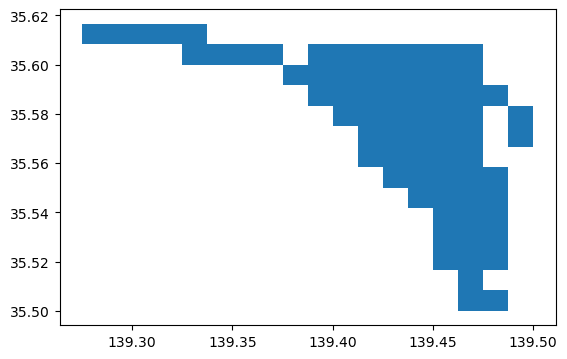

In [78]:
machida_pop.plot()

1kmメッシュの重点を求めるために，座標系をEPSG:2451とする。この2451は，距離が正しく測れる座標系の一つである。座標系を変換した後に`machida_pop.centroid`によって各メッシュ（各行）のgeometryの重心を求めて，それを改めて`machida_pop`の`centroid`列に覚えておく。

In [79]:
machida_pop=machida_pop.to_crs(epsg=2451)
machida_pop["centroid"]=machida_pop["geometry"].centroid

`machida_pop`の`centroid`列を，`machida_pop`の`geometry`として設定する。このために，`set_geometry()`を用いる。

<Axes: >

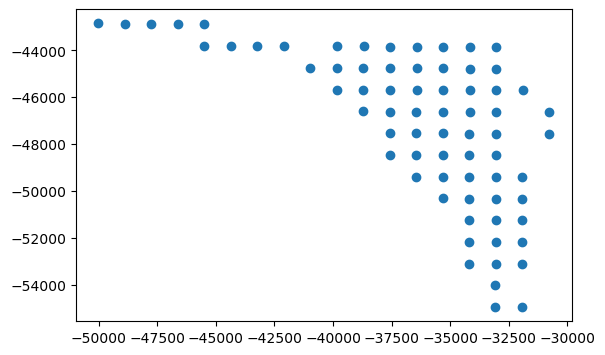

In [84]:
machida_pop.set_geometry("centroid",inplace=True)
machida_pop.plot()

<Axes: >

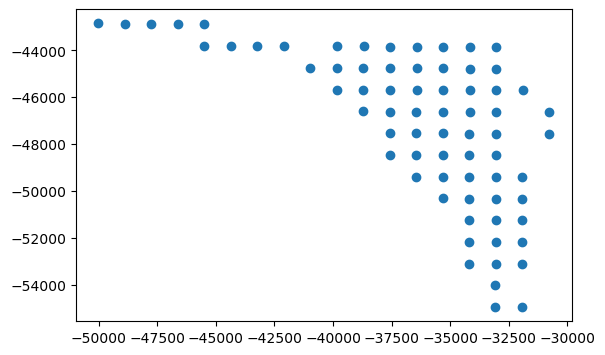